# Nuvem de palavras das propostas dos candidatos a prefeito de Feira de Santana

Os candidatos a prefeito das cidades precisam submeter uma proposta
de governo. Os links para as propostas estão disponíveis no portal
[DivulgaCandContas](https://divulgacandcontas.tse.jus.br/) do TSE.

Através de uma iniciativa colaborativa, coletamos os links e extraímos
o texto das propostas. Veja mais sobre isso no [Dados de planos de governo de candidatos às prefeituras dos municípios em 2020](https://dadosabertos.social/t/dados-de-planos-de-governo-de-candidatos-as-prefeituras-dos-municipios-em-2020/645/1).

Nessa análise vamos visualizar uma nuvem de palavras das propostas a
candidatos de toda Bahia e de Feira de Santana.

Com isso queremos responder as perguntas:

1. Quais são as palavras de destaque entre os candidatos a prefeito de Feira?
2. Quais são as palavras de destaque entre todos os candidatos a prefeito de Feira juntos?
3. Quais são as palavras de destaque entre todos os candidatos a prefeito da Bahia?

In [19]:
import os


proposals_and_cities = {}

# estrutura: cidade > proposta-<candidato>.txt
for folder, _, files in os.walk("BA"):
    if files:
        proposals_and_cities[folder] = files
proposals_and_cities["BA/feira-de-santana"]

['proposta-de-beto-tourinho.txt',
 'proposta-de-carlos-medeiros.txt',
 'proposta-de-colbert-martins.txt',
 'proposta-de-jose-de-arimateia.txt',
 'proposta-de-marcela-prest.txt',
 'proposta-de-professora-dayane-pimentel.txt',
 'proposta-de-ze-neto.txt']

# Propostas por candidato

In [20]:
from scripts.nlp import remove_portuguese_stopwords

import pandas as pd
import texthero as hero
from texthero import preprocessing


custom_pipeline = [preprocessing.remove_digits,
                   preprocessing.remove_diacritics,
                   preprocessing.remove_whitespace]

candidates_and_proposals = {}
directory = "BA/feira-de-santana"
for file_name in proposals_and_cities[directory]:
    candidate_name = file_name[12:]
    candidate_name = candidate_name.replace(".txt", "")
    candidate_name = candidate_name.replace("-", " ")
    candidate_name = candidate_name.title()
    print(candidate_name)
    content = open(f"{directory}/{file_name}").read()
    custom_stop_words = ["feira", "santana", "municipio", "municipal", "município"]
    cleaned_text = remove_portuguese_stopwords(content, custom_stop_words)
    cleaned_text = pd.Series(cleaned_text)
    cleaned_text = hero.clean(cleaned_text, custom_pipeline)
    candidates_and_proposals[candidate_name] = cleaned_text


Beto Tourinho
Carlos Medeiros
Colbert Martins
Jose De Arimateia
Marcela Prest
Professora Dayane Pimentel
Ze Neto


------------------------ Beto Tourinho


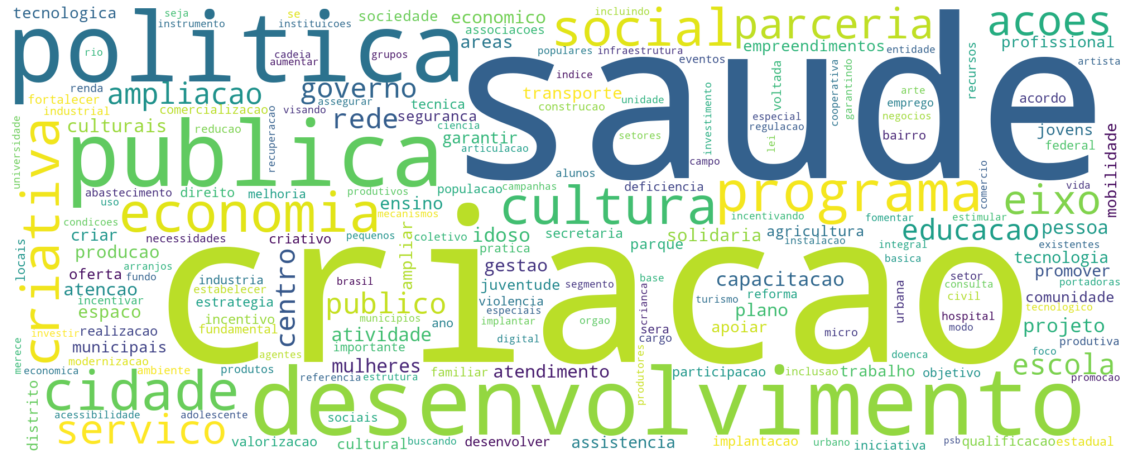

------------------------ Carlos Medeiros


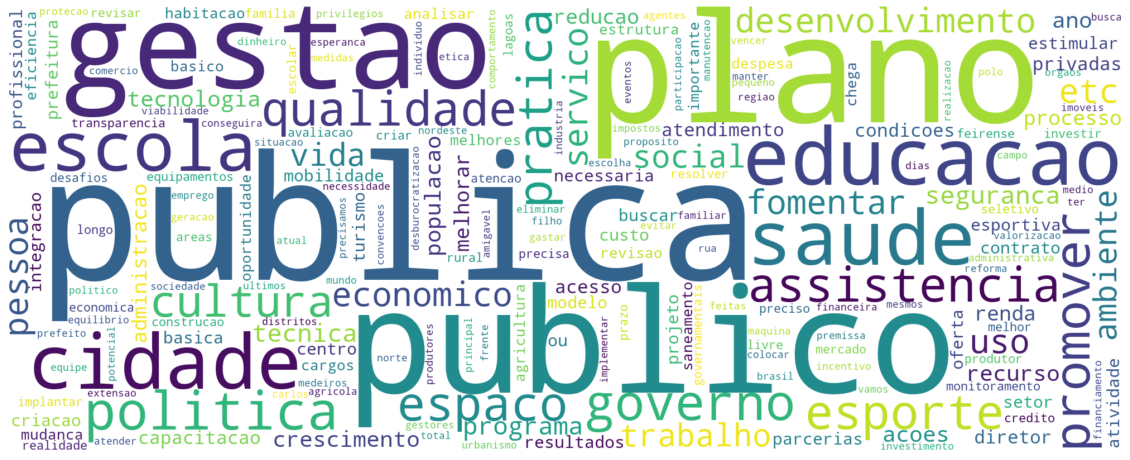

------------------------ Colbert Martins


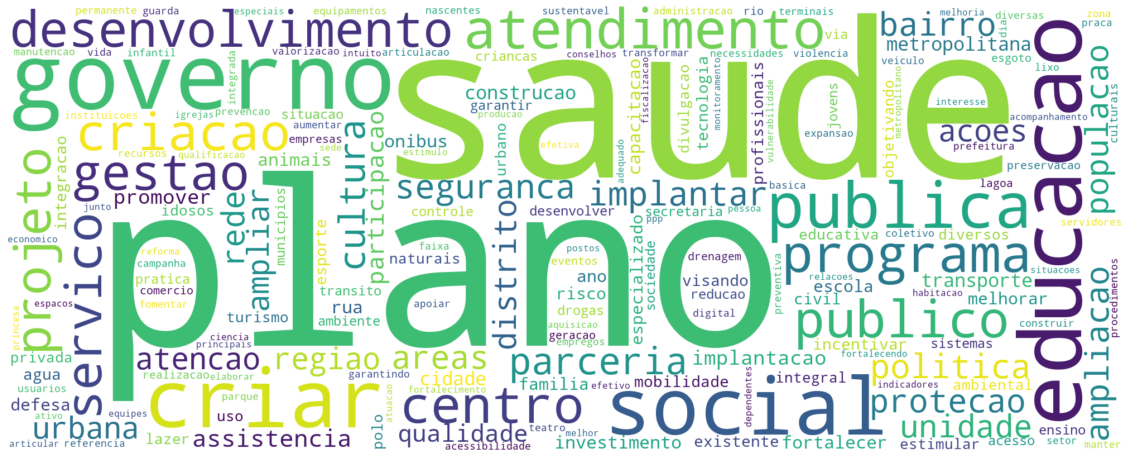

------------------------ Jose De Arimateia


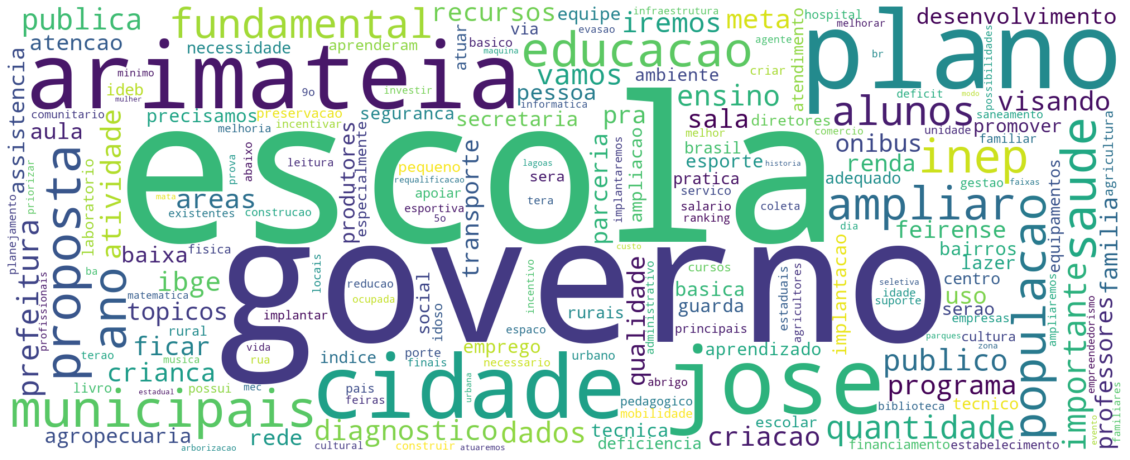

------------------------ Marcela Prest


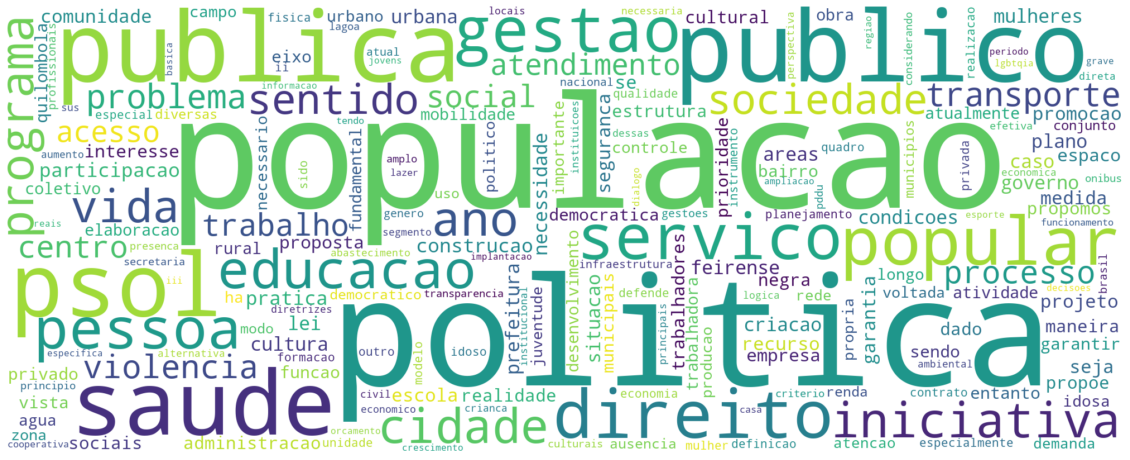

------------------------ Professora Dayane Pimentel


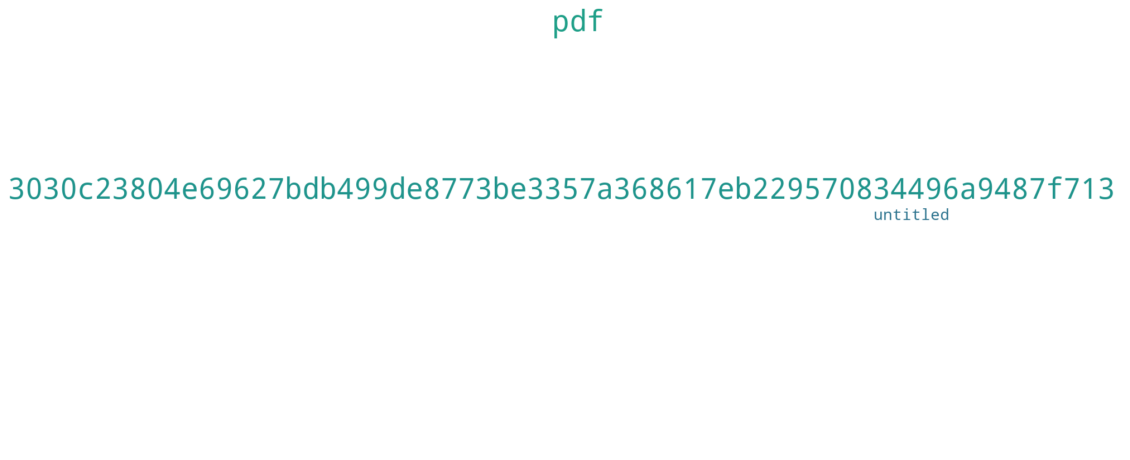

------------------------ Ze Neto


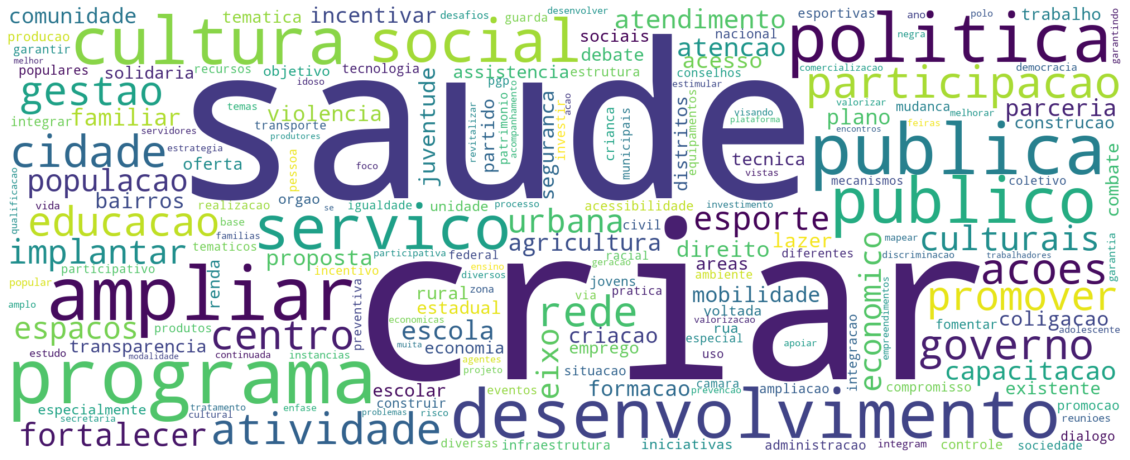

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


for candidate, proposal in candidates_and_proposals.items():
    print(f"------------------------ {candidate}")
    text = " ".join(proposal)
    wordcloud = WordCloud(background_color="white", width=2000, height=800, collocations=False).generate(text)
    fig = plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    fig.savefig(f"nuvem-de-palavras-das-propostas-de-{candidate.replace(' ', '-').lower()}.png", dpi=fig.dpi)
    plt.show()


Não foi possível visualizar as propostas da candidata Professora Dayane Pimentel porque
o arquivo é composto de imagens, ao invés de texto. Tentamos contato com a candidata
para corrigir o arquivo, não apenas por conta da análise mas também porque não é acessível
para pessoas com deficiência, porém fomos ignorados.


## O que acontece se juntarmos todos?

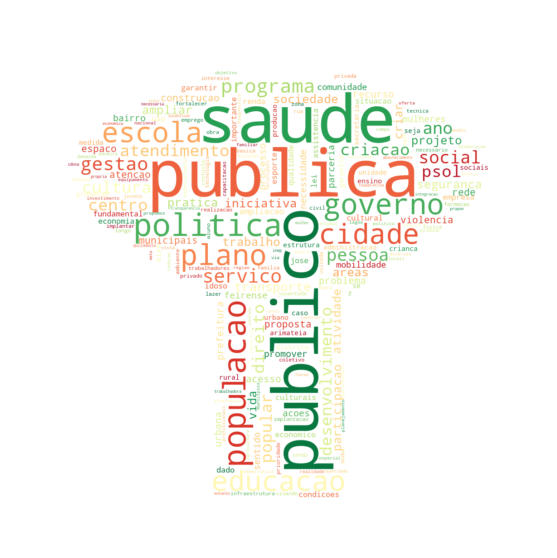

In [22]:
all_proposals = []
for _, proposal in candidates_and_proposals.items():
    all_proposals.extend(proposal)

imagem = cv2.imread("images/caixa-dagua-do-tomba.jpg")
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)

text = " ".join(all_proposals)
wordcloud = WordCloud(background_color="white", mask=mask, collocations=False, colormap="RdYlGn").generate(text)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig(f"nuvem-de-palavras-dos-candidatos-a-prefeito-de-feira.png", dpi=fig.dpi)
plt.show()

# E na Bahia?

O que será que as propostas de todos os candidatos a prefeito dizem?

In [23]:
from scripts.nlp import remove_portuguese_stopwords

import pandas as pd
import texthero as hero
from texthero import preprocessing


custom_pipeline = [preprocessing.remove_digits,
                   preprocessing.remove_diacritics,
                   preprocessing.remove_whitespace]

all_proposals = []
for city, proposals in proposals_and_cities.items():
    for proposal in proposals:
        content = open(f"{city}/{proposal}").read()
        custom_stop_words = ["municipio", "municipal", "município"]
        cleaned_text = remove_portuguese_stopwords(content, custom_stop_words)
        cleaned_text = pd.Series(cleaned_text)
        cleaned_text = hero.clean(cleaned_text, custom_pipeline)
        all_proposals.extend(cleaned_text)

In [24]:
text = " ".join(all_proposals)

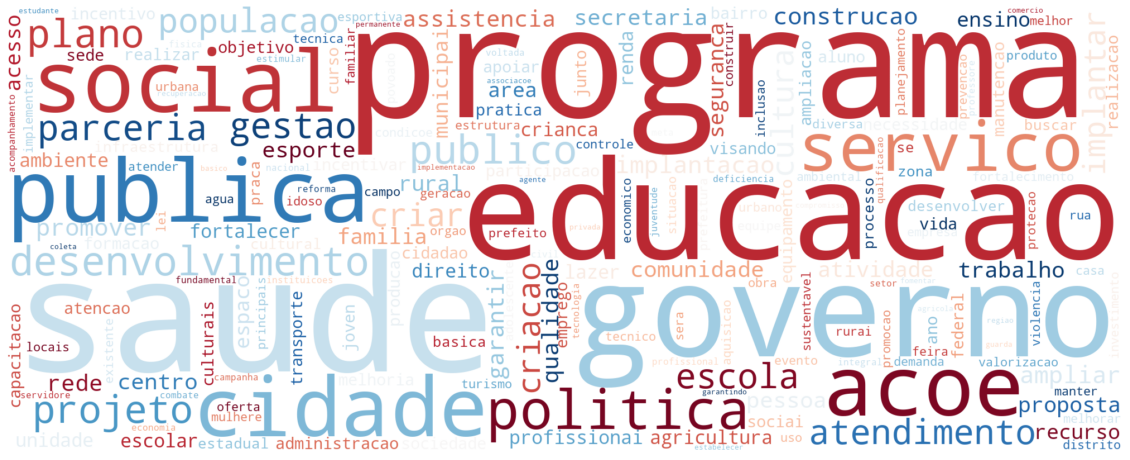

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


wordcloud = WordCloud(background_color="white", width=2000, height=800, colormap="RdBu", collocations=False).generate(text)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig(f"nuvem-de-palavras-dos-candidatos-prefeito-bahia.png", dpi=fig.dpi)
plt.show()

De acordo com as nuvens de palavras, saúde e educação são os temas que mais se destacam entre os planos de governo.